# Bank Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the file and creating the data frame
df=pd.read_csv(r"C:\Users\SAAD\Downloads\bank-marketing-uci\bank.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#finding the features
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
# finding the unique values in each feature
for column in df.select_dtypes(include="object").columns:
    print(column)
    print(df[column].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [6]:
#find the missing features.
null_features=[null_feature for null_feature in df.columns if df[null_feature].isnull().sum()>=1]
for null_feature in null_features:
    print(null_feature,"feature is missing")
else:
    print("No missing feature")

No missing feature


In [7]:
#number of values for each feature.
for column in df.columns:
    print(column,df[column].nunique())

age 67
job 12
marital 3
education 4
default 2
balance 2353
housing 2
loan 2
contact 3
day 31
month 12
duration 875
campaign 32
pdays 292
previous 24
poutcome 4
y 2


In [8]:
# finding the categorical features
categorical_features=[categorical_feature  for categorical_feature in df.select_dtypes(include="object").columns]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

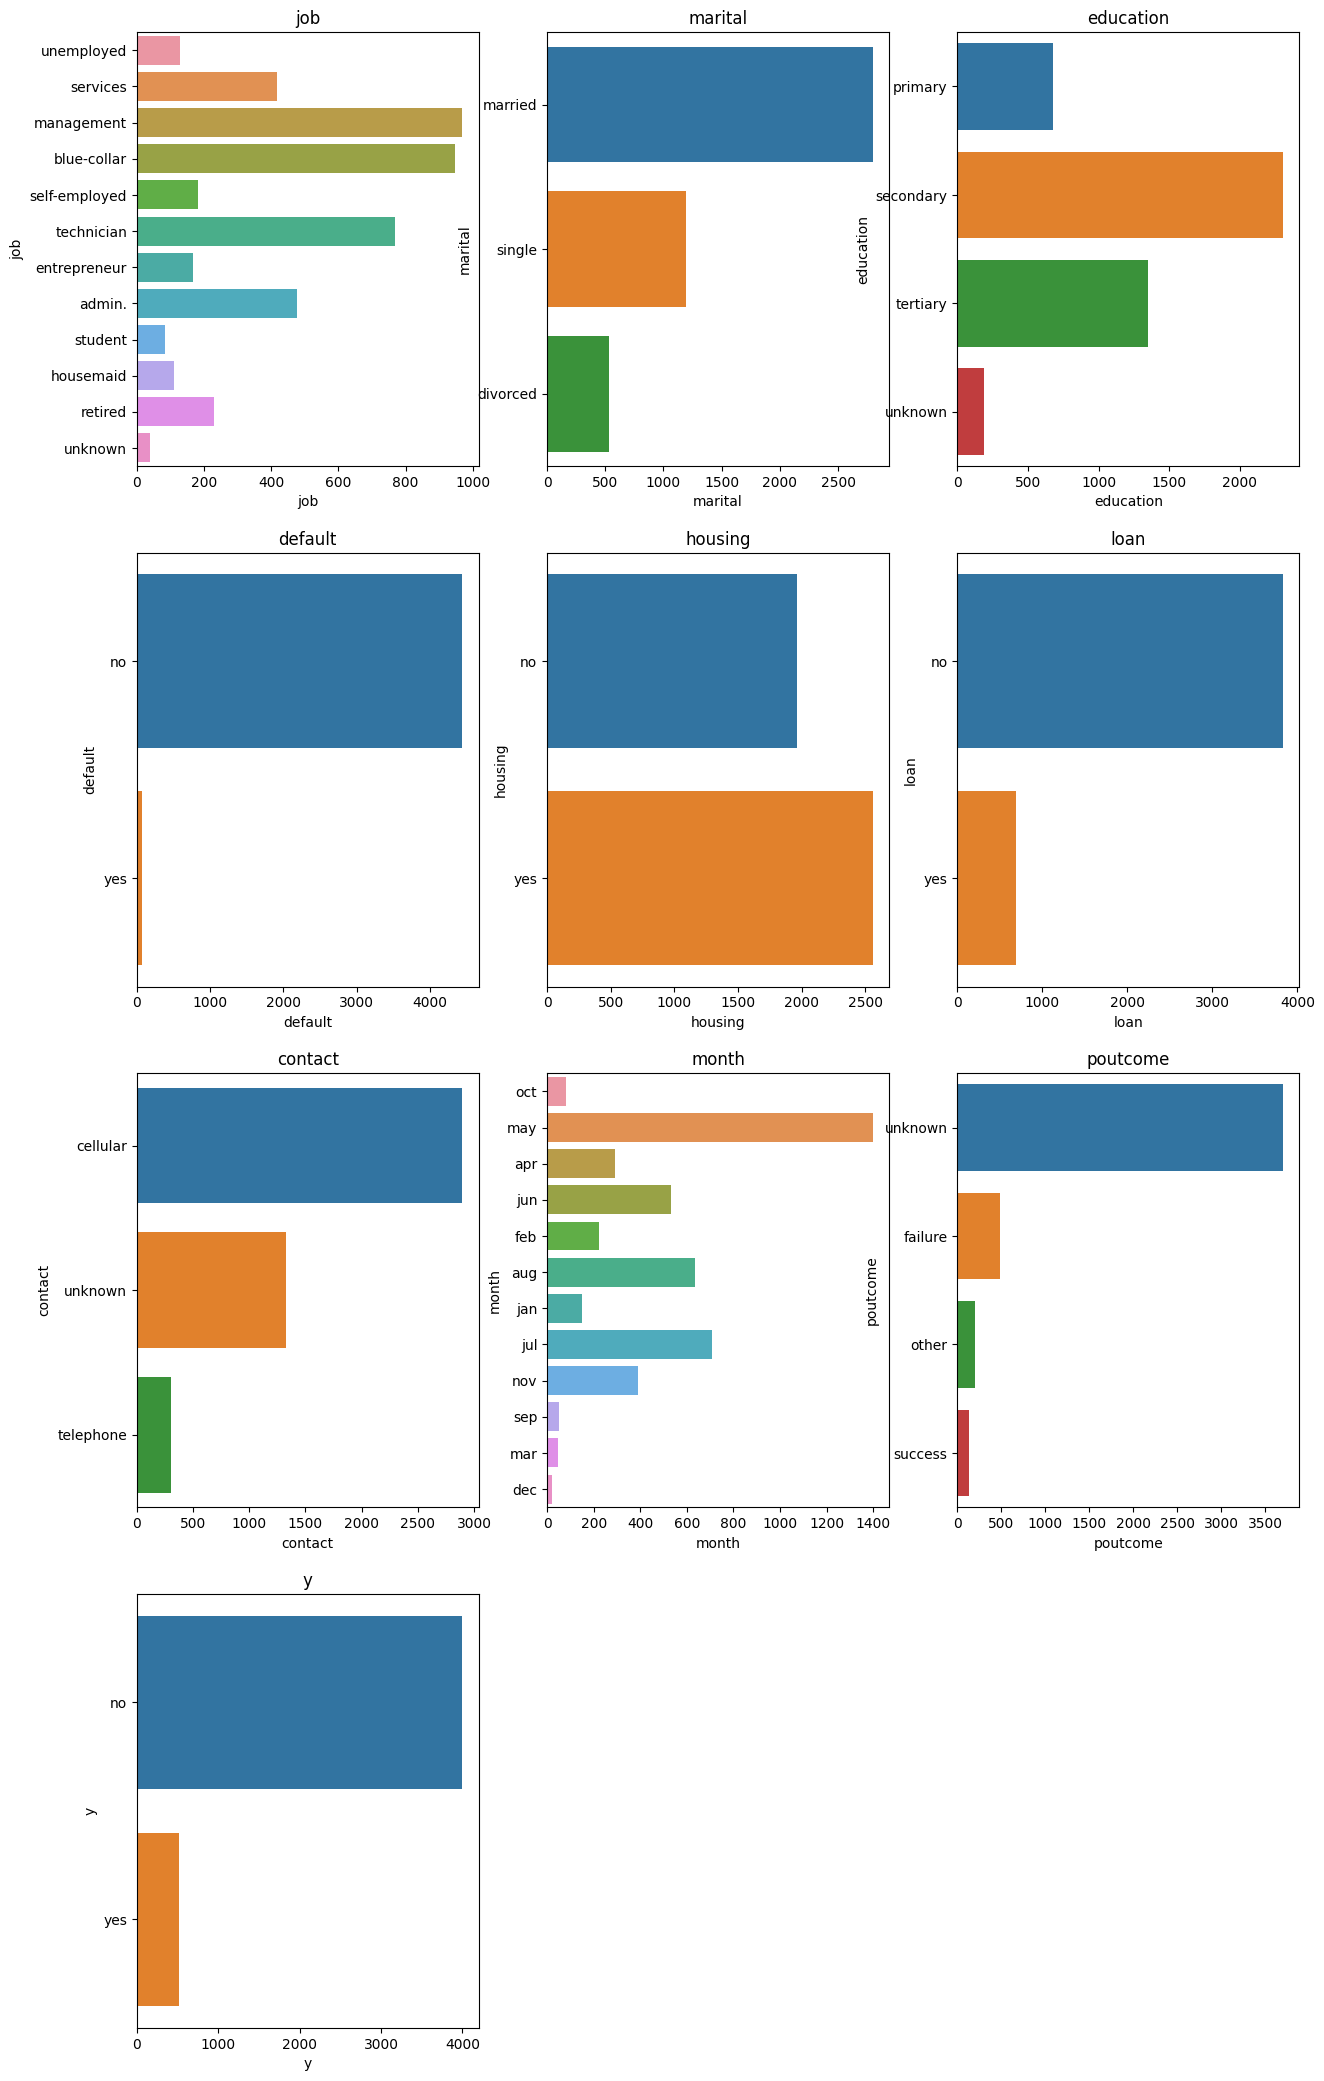

In [9]:
plt.figure(figsize=(15,80),facecolor="white")
plotn=1
for categorical_feature in categorical_features :
    ax = plt.subplot(12,3,plotn)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotn+=1
plt.show()

Take down
- There are more people with management as their profession
- The set also have more number of people with secondary education.
- The set also have comparatively more married people than single and divorced.
- More people in this data set have housing
- Majority of them have no loan.
- For previous campaign cellular communication is primarily used.
- Month of May have more data but December have low.

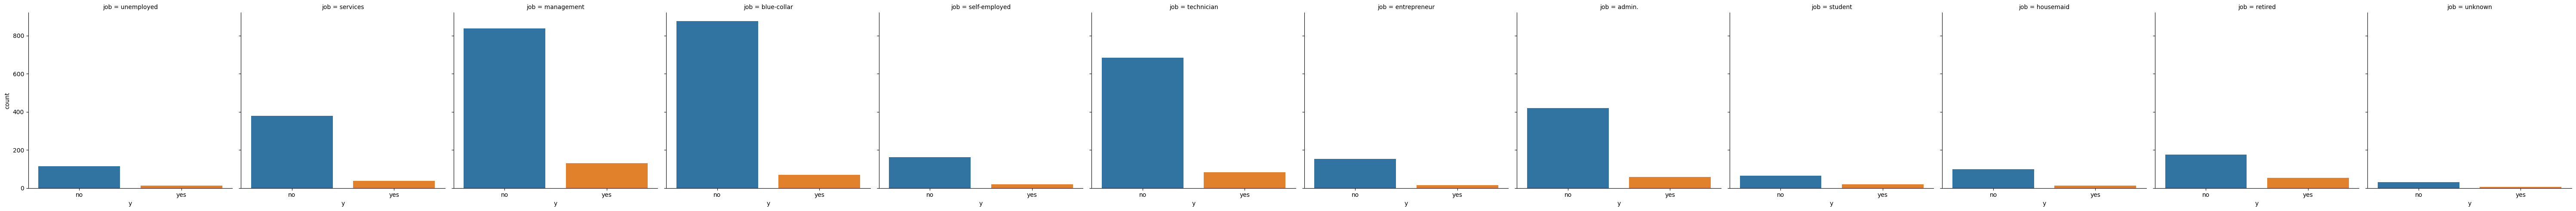

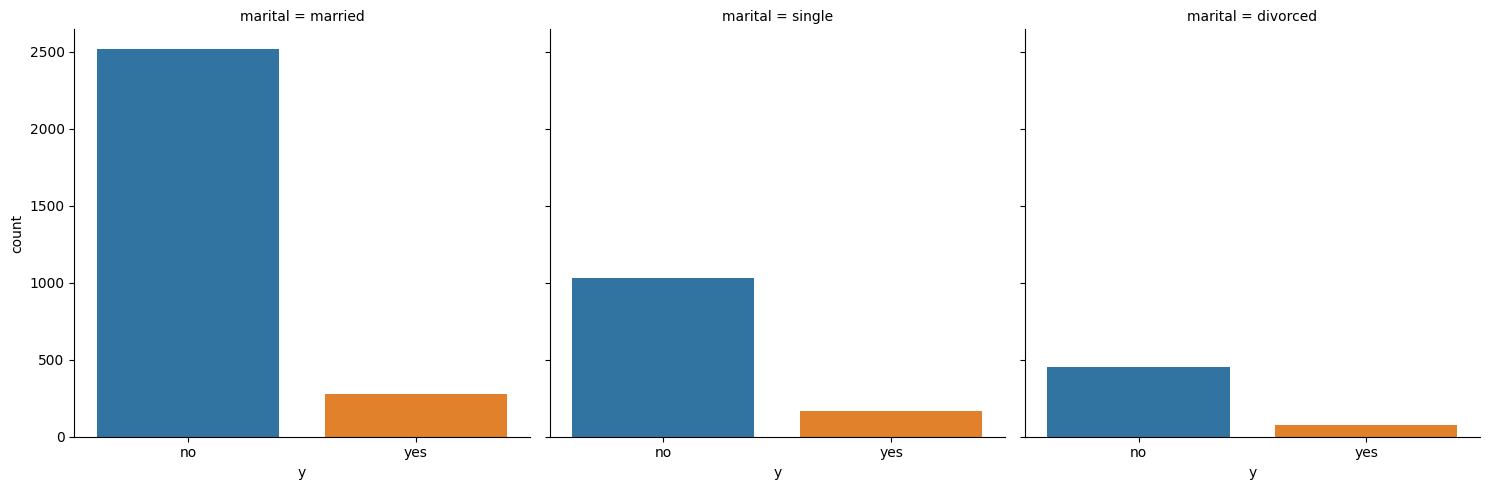

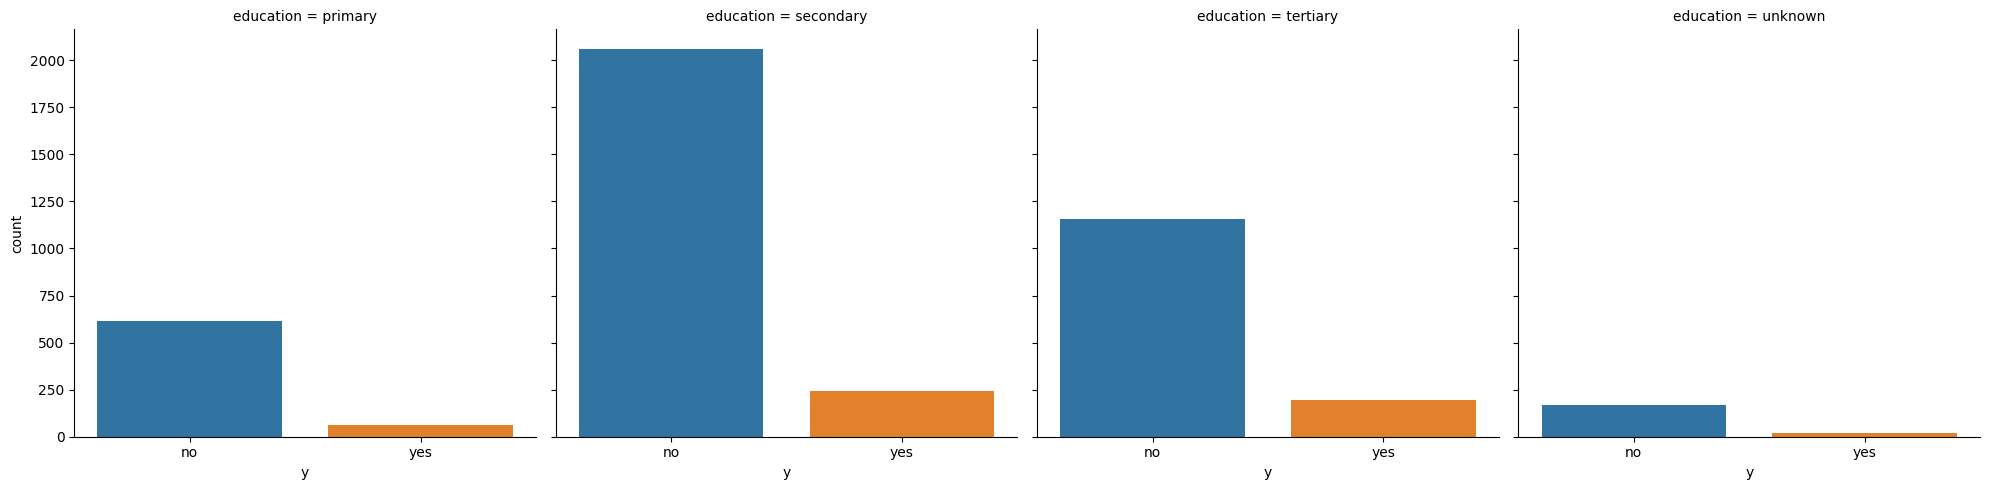

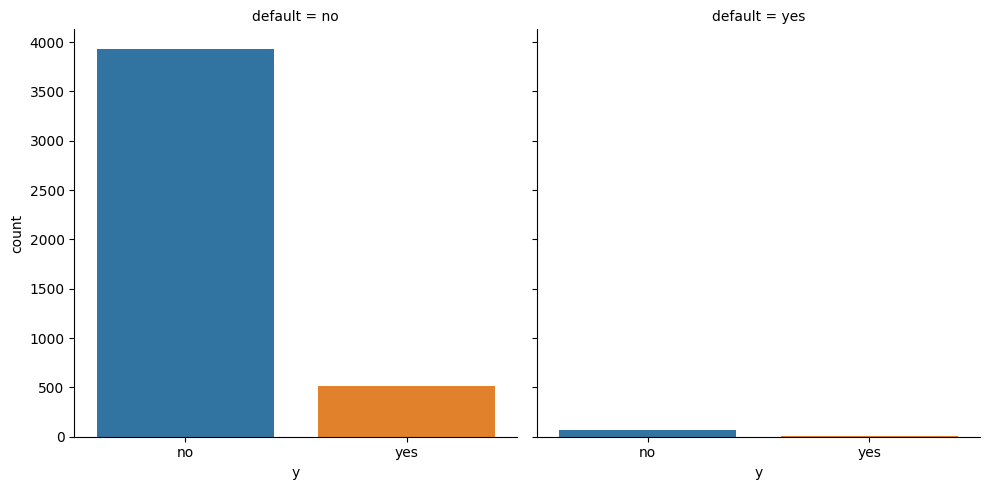

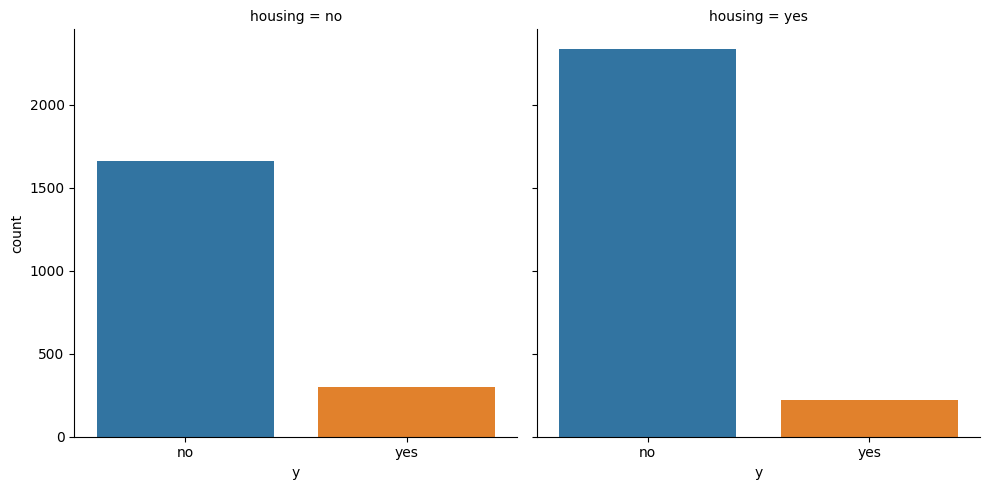

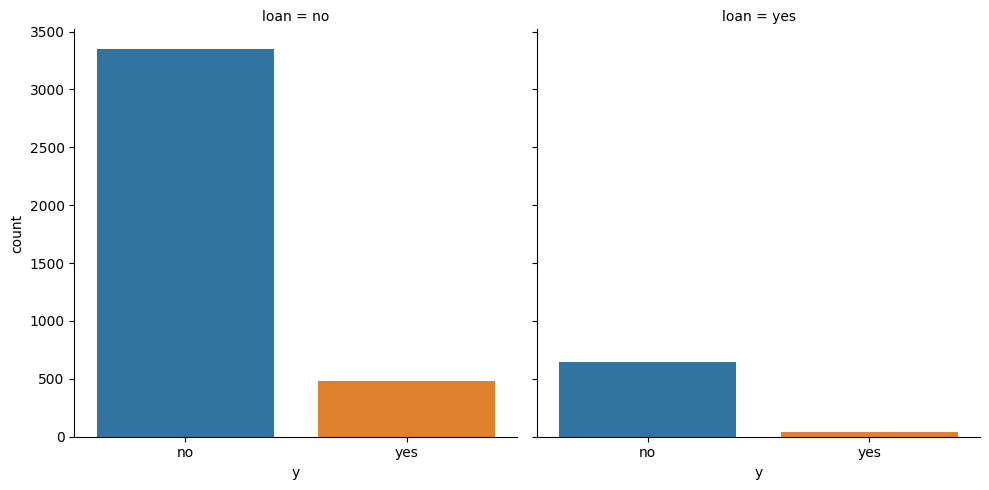

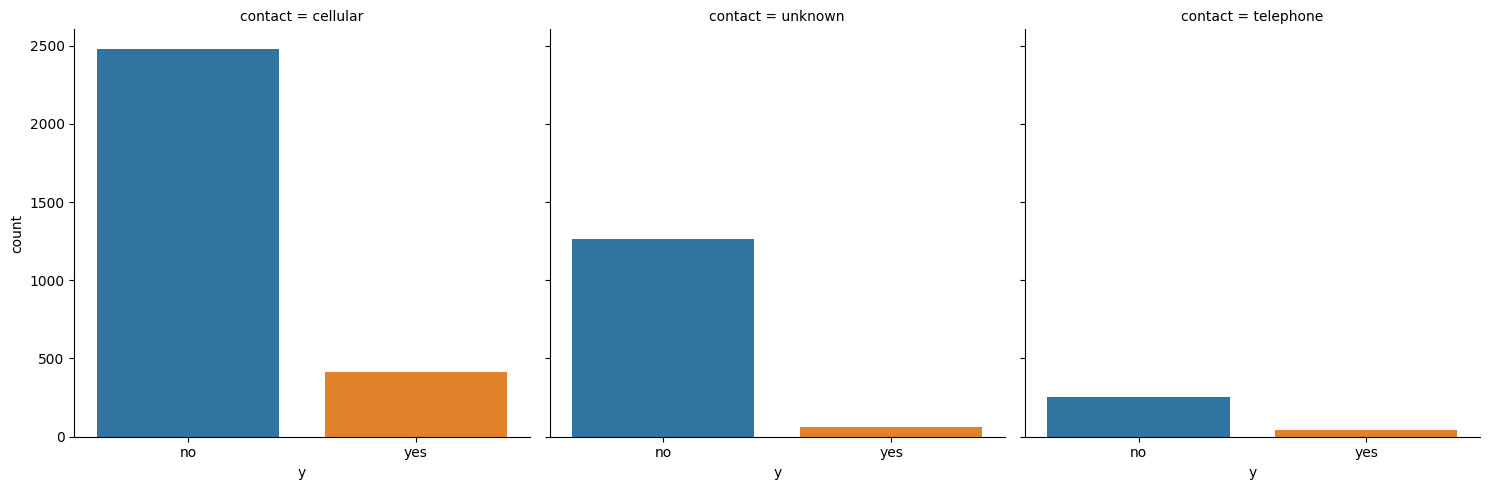

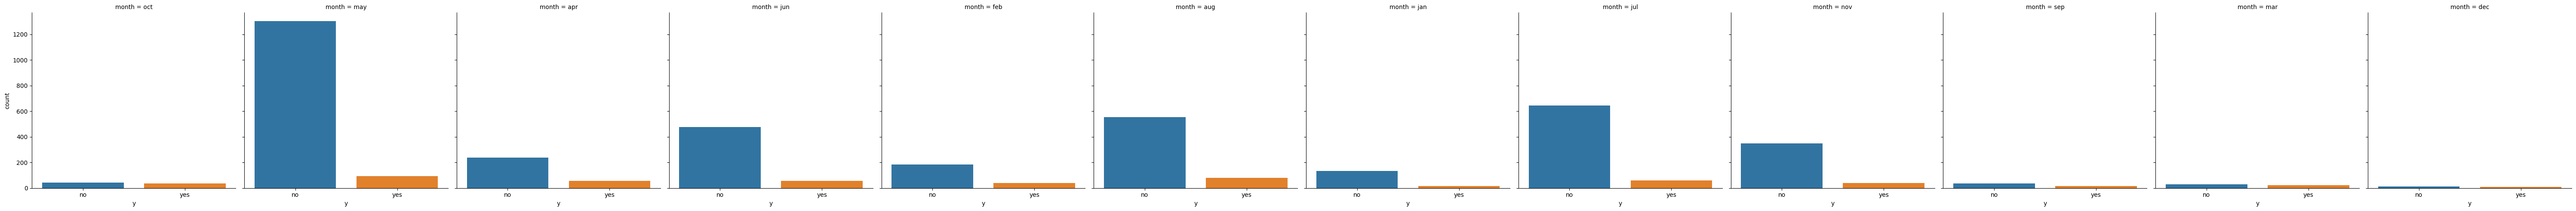

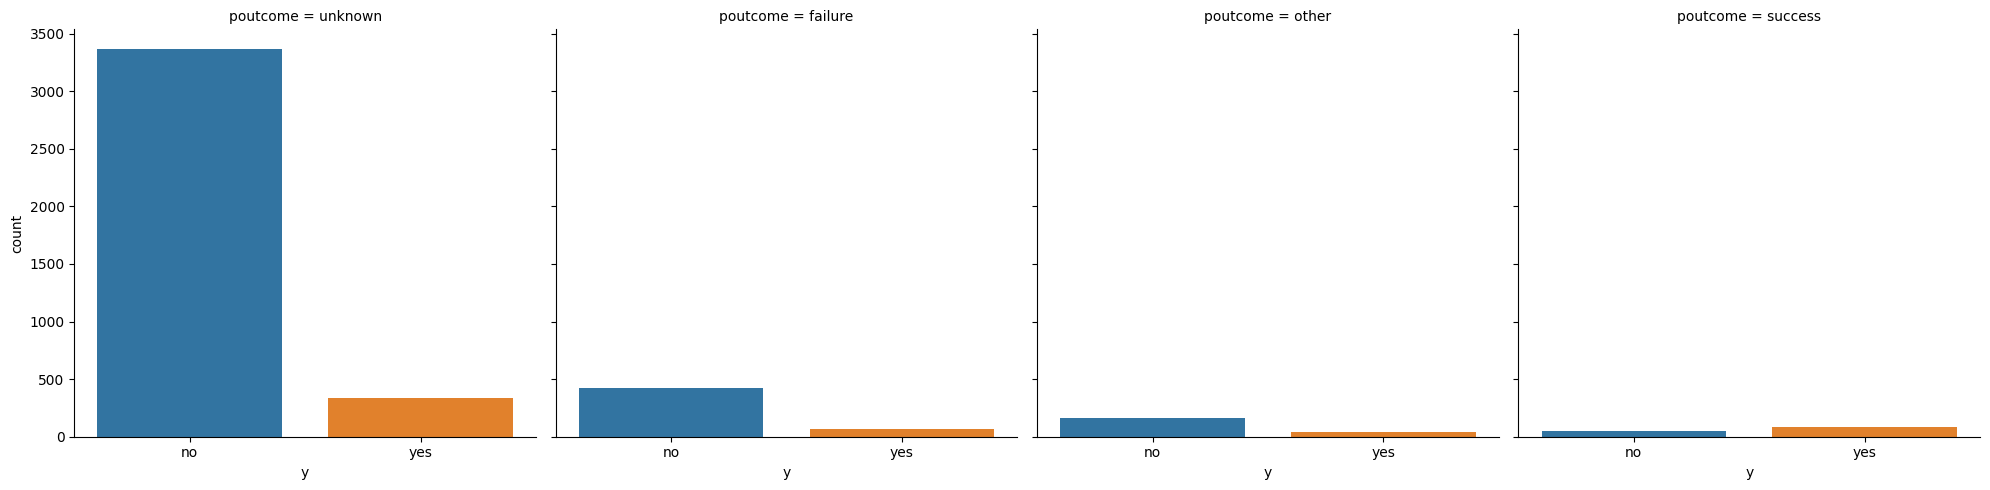

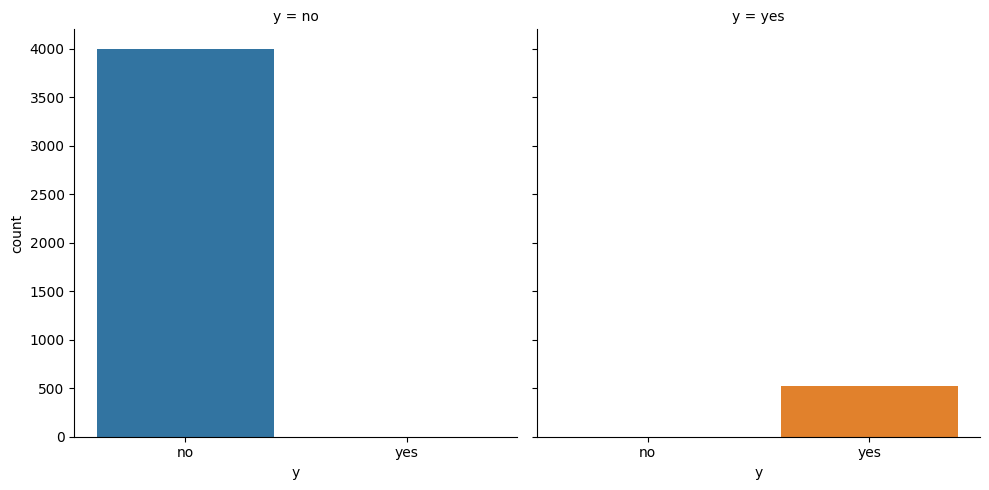

In [10]:
for categorical_feature in categorical_features :
    sns.catplot(x="y", col=categorical_feature, kind="count" , data=df)
plt.show()

In [11]:
for categorical_feature in categorical_features :
    print(df.groupby(["y",categorical_feature]).size())

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
dtype: int64
y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64
y    education
no   primary       614
     secondary    2061
     tertiary     1157
     unknown       168
yes  primary        64
     secondary     245
     tertiary      193
     unkn

Take down
1. married people tends to deposit more as compare to single and divorced.
2. people with secondary education also show more intereset in deposit
3. people with no default tends to deposit comapretively more.
4. people with housing and  no housing tends to show equal interest in deposit.
5. people with loan do not consider to deposit much.
6. cellular communication has proved to be more effective as compared to other means of communication

In [12]:
# finding the numerical features
numerical_features=[numerical_feature for numerical_feature in df.select_dtypes(include=np.number).columns]
print(f"there are total {len(numerical_features)} numerical features")
df[numerical_features].head()

there are total 7 numerical features


,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0


In [13]:
discrete_features=[numerical_feature for numerical_feature in numerical_features if len(df[numerical_feature].unique())<20]
print(f"There are total {len(discrete_features)} discrete features")

There are total 0 discrete features


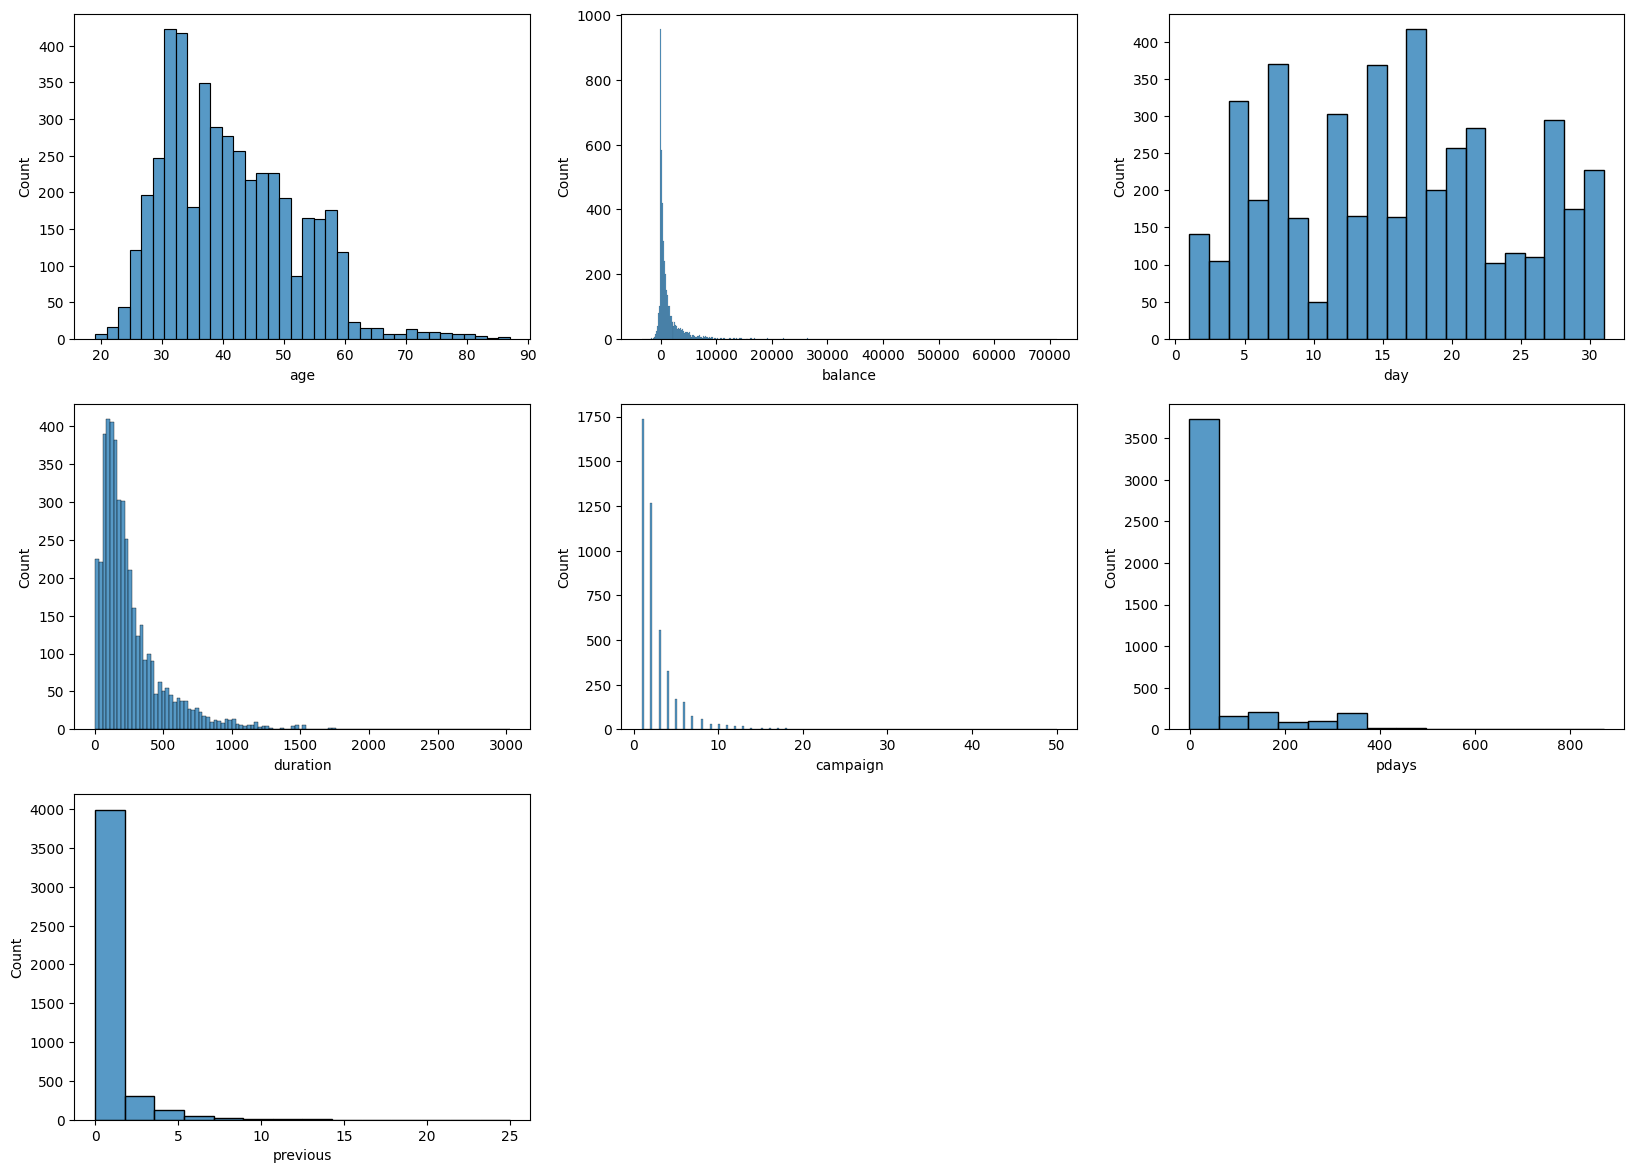

In [14]:
plt.figure(figsize=(20,60),facecolor="white")
plotnum =1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnum)
    sns.histplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnum+=1
plt.show()

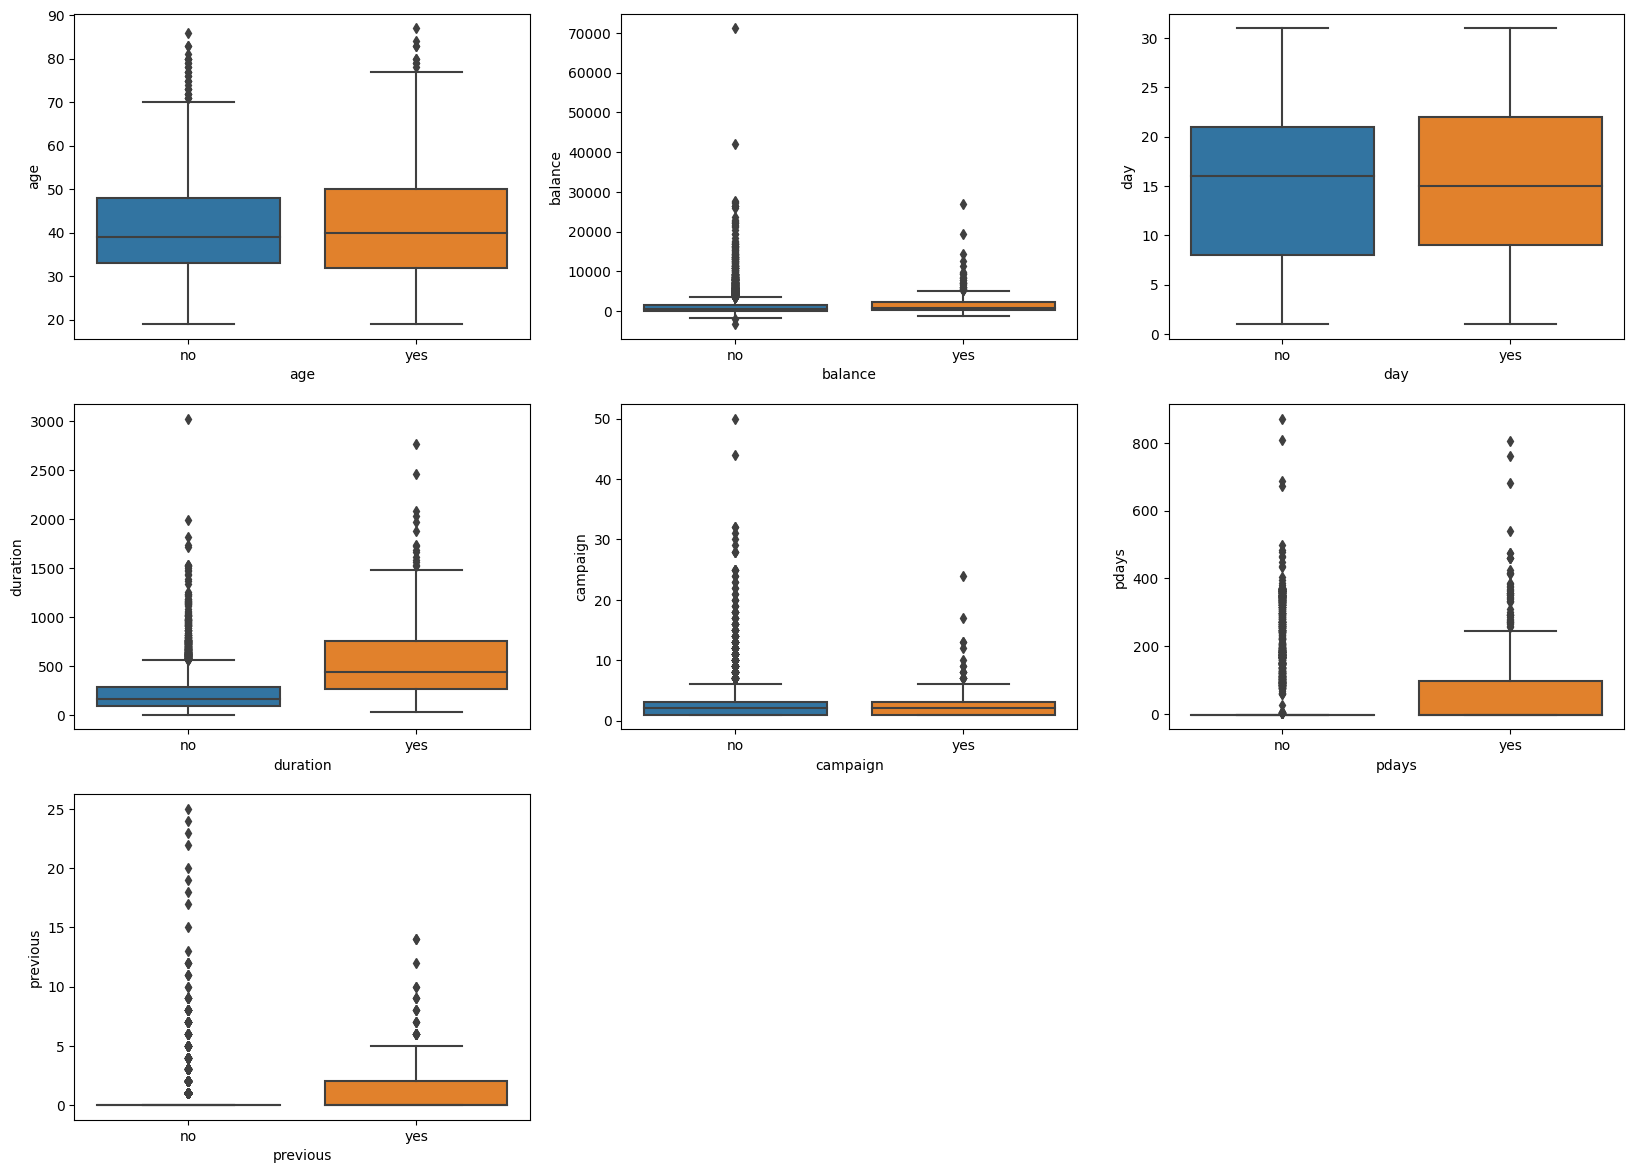

In [15]:
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for numerical_feature in numerical_features:
    ax =plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[numerical_feature],data=df)
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

there are outliers in numerical features
finding the outlier in numerical features

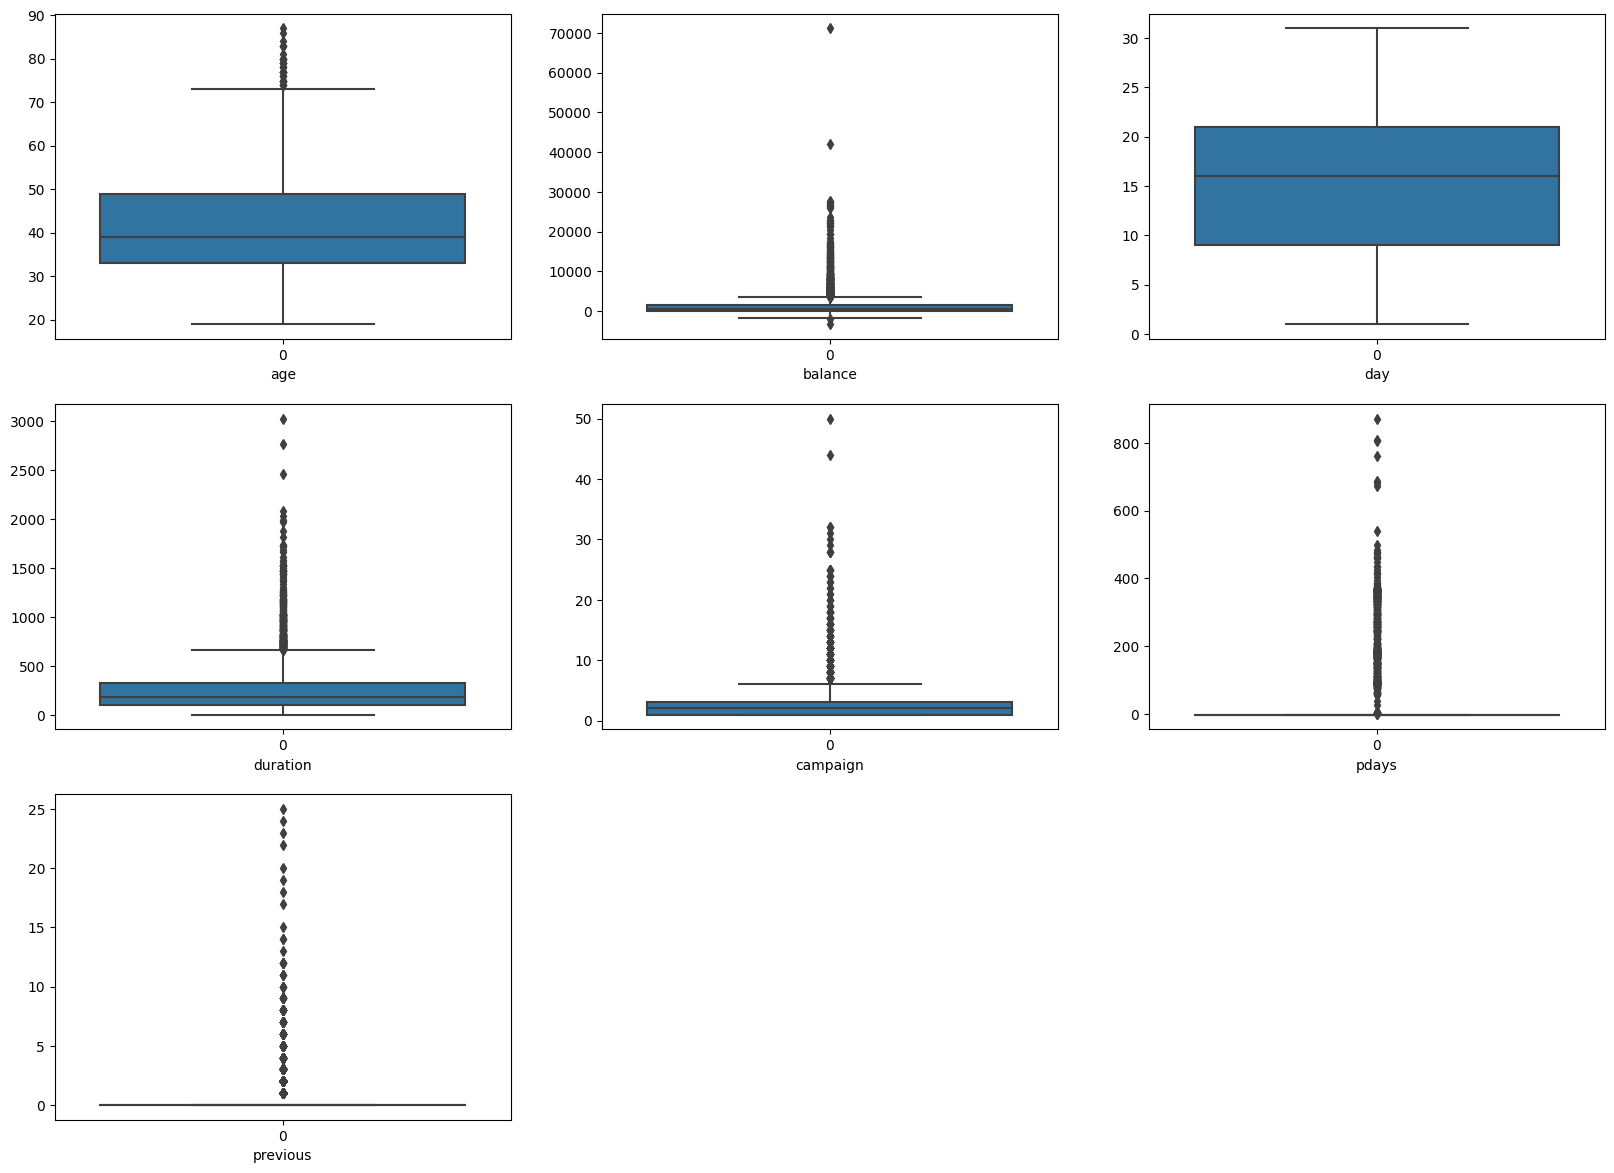

In [16]:
plt.figure(figsize=(20,60),facecolor="white")
plotnumber=1
for numerical_feature in numerical_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

checking the correlation

C:\Users\SAAD\AppData\Local\Temp\ipykernel_12640\2119062056.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


<AxesSubplot: >

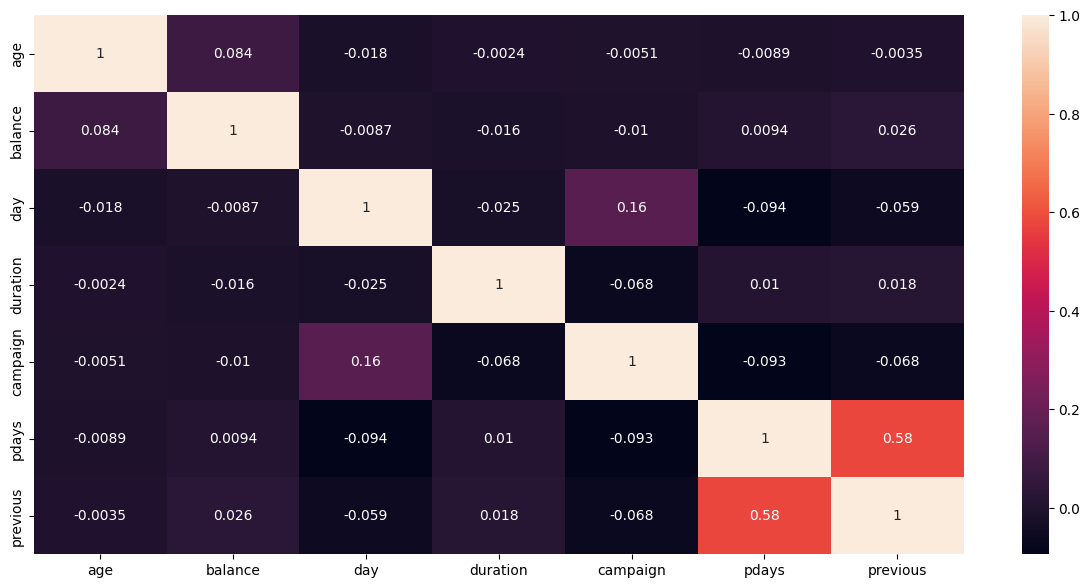

In [17]:
correlation_matrix=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(correlation_matrix, annot=True)


there is no very highly correlated features

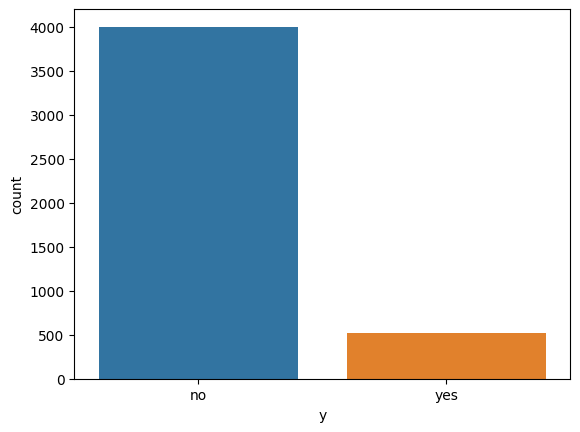

In [18]:
sns.countplot(x='y',data=df)
plt.show()

  the dataset is highly imbalance

In [19]:
count_n,count_y=df.y.value_counts()
count_n,count_y

(4000, 521)

In [20]:
df_y=df[df["y"]=="yes"]
df_n=df[df["y"]=="no"]

In [21]:
df_n_under=df_n.sample(count_y)
df_n_under.shape

(521, 17)

In [22]:
df_y.shape

(521, 17)

In [23]:
df_test_under=pd.concat([df_n_under,df_y],axis=0)

In [24]:
df_test_under

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4156,30,entrepreneur,single,secondary,no,638,no,no,cellular,14,jul,358,6,-1,0,unknown,no
260,54,housemaid,married,secondary,no,209,yes,yes,cellular,25,jul,97,1,-1,0,unknown,no
150,41,entrepreneur,married,unknown,no,89,yes,no,unknown,6,may,333,2,-1,0,unknown,no
1390,37,blue-collar,married,unknown,no,603,yes,no,unknown,23,may,773,2,-1,0,unknown,no
3628,29,services,married,secondary,no,182,yes,no,telephone,13,may,38,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes


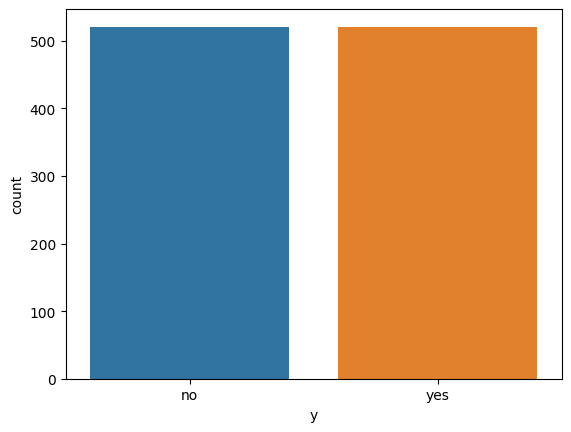

In [25]:
sns.countplot(x='y',data=df_test_under)
plt.show()

<div class =" alert alert-block alert-success">
    <b>per the exploratory data analysis EDA</b>
</div>

- no missing value found
- no feature found with one value
- there are some outliers in all categorical feature
- there are 9 categorical features

<div class= "alert alert-block alert-info">
    <b> feature Enginnering </b>
</div>

- Drop unwanted features
- Handle missing values
- Handle categorical features
- feature scaling
- Remove outliers

In [26]:
df2=df.copy()

In [27]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [28]:
df2.shape

(4521, 17)

In [29]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       3368
      2          7
      3          1
      5          1
      7          3
              ... 
yes   474        2
      541        1
      683        1
      761        1
      804        1
Length: 371, dtype: int64

In [30]:
# drop pdays as it has -1 for more than 40% of the values
df2.drop(['pdays'],axis=1,inplace=True)

In [31]:
# remove outliers in feature age
df2.groupby('age',sort=True)['age'].count()

age
19     4
20     3
21     7
22     9
23    20
      ..
81     1
83     4
84     1
86     1
87     1
Name: age, Length: 67, dtype: int64

In [32]:
# remove outliers in feature balance
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -3313      1
     -2082      1
     -1746      1
     -1680      1
     -1400      1
               ..
yes   11262     1
      12569     1
      14220     1
      19317     1
      26965     1
Name: balance, Length: 2604, dtype: int64

In [33]:
# remove outliers in feature duration
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   4           1
     5           9
     6           2
     7           6
     8           9
                ..
yes  1971        1
     2029        1
     2087        1
     2456        1
     2769        1
Name: duration, Length: 1149, dtype: int64

In [34]:
#remove outliers in feature campaign
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           1494
     2           1126
     3            501
     4            282
     5            158
     6            139
     7             69
     8             52
     9             28
     10            26
     11            22
     12            20
     13            15
     14            10
     15             9
     16             8
     17             6
     18             7
     19             3
     20             3
     21             2
     22             2
     23             2
     24             2
     25             4
     28             3
     29             1
     30             1
     31             1
     32             2
     44             1
     50             1
yes  1            240
     2            138
     3             57
     4             43
     5              9
     6             16
     7              6
     8              4
     9              2
     10             1
     12             1
     13             2
     17           

In [35]:
df3=df2[df2['campaign']<25]

In [36]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           1494
     2           1126
     3            501
     4            282
     5            158
     6            139
     7             69
     8             52
     9             28
     10            26
     11            22
     12            20
     13            15
     14            10
     15             9
     16             8
     17             6
     18             7
     19             3
     20             3
     21             2
     22             2
     23             2
     24             2
yes  1            240
     2            138
     3             57
     4             43
     5              9
     6             16
     7              6
     8              4
     9              2
     10             1
     12             1
     13             2
     17             1
     24             1
Name: campaign, dtype: int64

In [37]:
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           3354
     1            235
     2            143
     3             91
     4             53
     5             34
     6             16
     7             19
     8             15
     9              7
     10             2
     11             3
     12             4
     13             1
     15             1
     17             1
     18             1
     19             1
     20             1
     22             1
     23             1
     24             1
     25             1
yes  0            337
     1             51
     2             50
     3             22
     4             25
     5             13
     6              9
     7              3
     8              3
     9              3
     10             2
     12             1
     14             2
Name: previous, dtype: int64

In [85]:
df20=df3[df3['previous']<15]

In [86]:
df20.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           3354
     1            235
     2            143
     3             91
     4             53
     5             34
     6             16
     7             19
     8             15
     9              7
     10             2
     11             3
     12             4
     13             1
yes  0            337
     1             51
     2             50
     3             22
     4             25
     5             13
     6              9
     7              3
     8              3
     9              3
     10             2
     12             1
     14             2
Name: previous, dtype: int64

In [87]:
cat_columns=['job','marital','education','contact','month','poutcome']
for col in cat_columns:
    df20=pd.concat([df20.drop(col,axis=1),pd.get_dummies(df20[col], prefix = col, prefix_sep='_',drop_first=True,dummy_na=False)],axis=1)
print(df20.columns.values)

['age' 'default' 'balance' 'housing' 'loan' 'day' 'duration' 'campaign'
 'previous' 'y' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_married' 'marital_single' 'education_secondary'
 'education_tertiary' 'education_unknown' 'contact_telephone'
 'contact_unknown' 'month_aug' 'month_dec' 'month_feb' 'month_jan'
 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct'
 'month_sep' 'poutcome_other' 'poutcome_success' 'poutcome_unknown']


In [88]:
bool_columns= ['default','housing','loan','y']
for col in bool_columns:
    df20[col+'_new']=df20[col].apply(lambda x : 1 if x=='yes' else 0)
    df20.drop(col,axis=1,inplace=True)

In [90]:
df20.head()
df20.dtypes

age                    int64
balance                int64
day                    int64
duration               int64
campaign               int64
previous               int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
contact_telephone      uint8
contact_unknown        uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun              uint8
month_mar              uint8
month_may              uint8
month_nov              uint8
month_oct              uint8
month_sep     

<div class="alert alert-block alert-info">
    <b>Train Test Split</b>
</div>

In [95]:
X=df19.drop(['y_new'],axis=1)
y=df19['y_new']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [96]:
len(X_train)

3598

In [97]:
len(X_test)

900

<div class =" alert alert-block alert-info">
    <b>Model Selection</b>
</div>

In [104]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [99]:
from sklearn.model_selection import cross_val_score
model_score=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.90277778 0.9        0.89722222 0.90125174 0.8984701 ]
0.8999443671766343


In [100]:
from sklearn.model_selection import cross_val_score
model_score=cross_val_score(estimator=XGBClassifier(),X=X_train,y=y_train,cv=5)
print(model_score)
print(model_score.mean())

[0.91666667 0.88611111 0.91388889 0.90403338 0.89568846]
0.9032777005099675


In [114]:
#parameter tunning
model_param={
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators':[10,50,100,130],
            'criterion':['gini','entropy'],
            'max_depth':range(2,4,1),
            'max_features':['sqrt','log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
            'learning_rate':[0.5,0.1,0.01,0.001],
            'max_depth':[3,5,10,20],
            'n_estimators':[10,50,100,200]
        }
    }
}

In [116]:
#gridsearch
scores=[]
for model_name,mp in model_param.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model':model_name,
        'best_score':model_selection.best_score_,
        'best_params':model_selection.best_params_
    })

In [117]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8848382153009517,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.8992890866394759,
  'best_params': {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}}]

<div class ="alert alert-block alert-info">
    <b>Model Building</b>
</div>

In [118]:
#xgboost gives the better score therfore i selected it.
model_xgb=XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [120]:
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [122]:
model_xgb.score(X_test,y_test)

0.8833333333333333

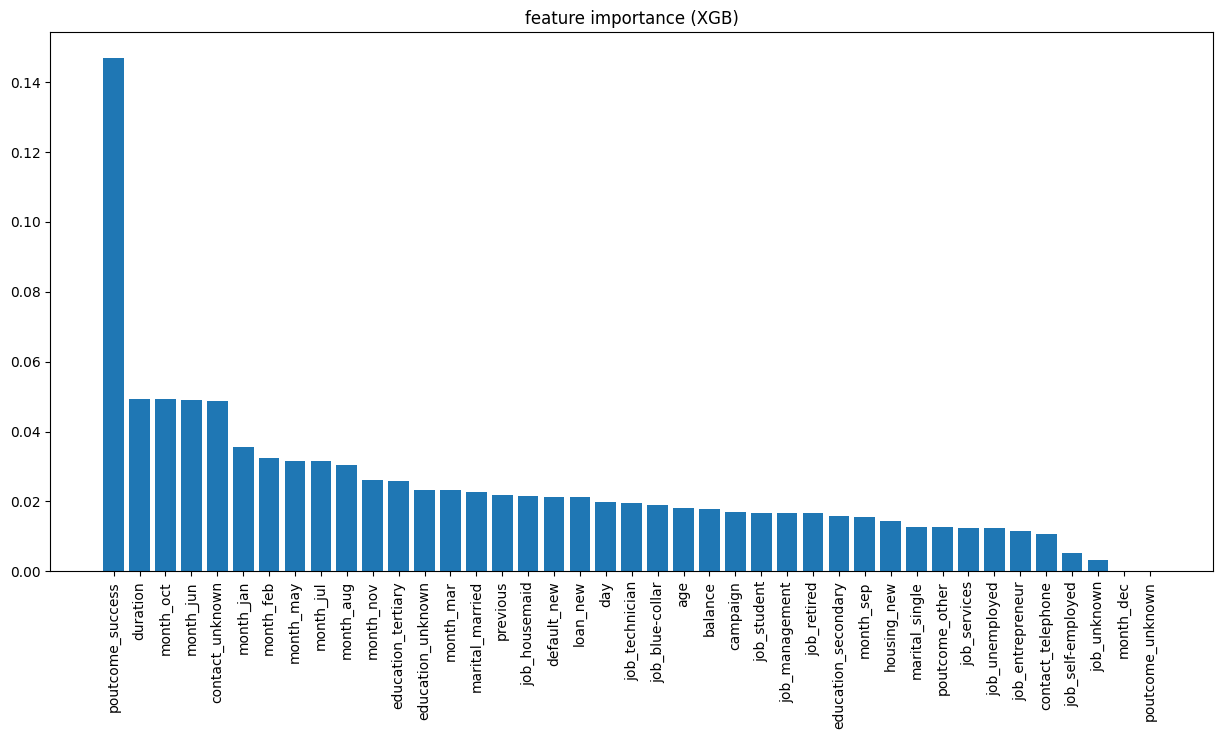

In [124]:
#get feature importances from the model
headers=["name","score"]
values=sorted(zip(X_train.columns,model_xgb.feature_importances_),key=lambda x:x[1]*-1)
xgb_feature_importances=pd.DataFrame(values,columns=headers)


#plot feature importances
fig=plt.figure(figsize=(15,7))
x_pos=np.arange(0,len(xgb_feature_importances))
plt.bar(x_pos,xgb_feature_importances['score'])
plt.xticks(x_pos,xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('feature importance (XGB)')
plt.show()

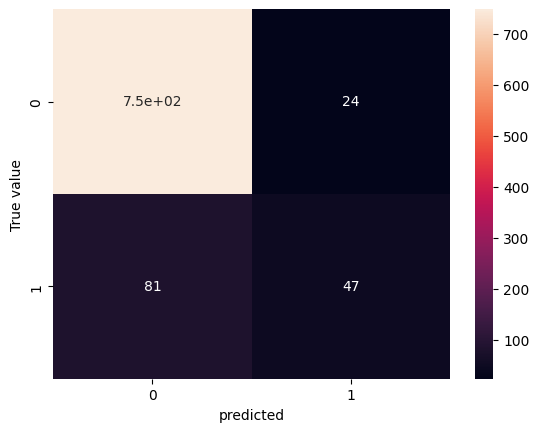

In [129]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model_xgb.predict(X_test))
cm
#plot the confusion matrix
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('True value')
plt.show()